In [111]:
from pandas import Series, DataFrame
import pandas as pd 
#import matplotlib.pyplot as plt
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
#%matplotlib

.1. Create a unique name for each restaurant. On the DataFrame created above, add a new column to your DataFrame, called 'RESTAURANT', that combines DBA, BUILDING, STREET, and ZIPCODE fields. For example, "WENDY’S 469 FLATBUSH AVENUE 11225".
Print the first 10 values of the RESTAURANT column of your DataFrame.  

I created a new key for df and made it equal to the sums (since they're all string it just concatenates) of the df[KEY] of the things I wanted the new column to equal.  

In [112]:
df['RESTAURANT'] = df['DBA']+ " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']

In [113]:
df[0:10]['RESTAURANT']


0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

.2. How many restaurants are included in the data?
Careful now:
• A "Subway" in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant 

I searched and found a method that does what I need. SERIES.nunique() takes a series and returns the total number of unique iterations. 

In [114]:
df['RESTAURANT'].nunique()

10114

.3. How many chains are there? Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode) addresses.  
I created a dataframe of just DBA and RESTAURANTS because those are the things I wanted to filter on. By dropping duplicates I remove all of the exact same restaurants from the list.  

Then I created another dataframe that's been filtered so I only have restaurants with at least two occurances. Then I again found the nunique. 

In [115]:
df2 = df[['DBA', 'RESTAURANT']].drop_duplicates()

df3 = df2.groupby('DBA').filter(lambda x: len(x)>1)

df3['DBA'].nunique()


368

.4. Plot a bar graph of the top 20 most popular chains. We already have the chains from the previous problem. 

Took the series of just the DBA names and counted. It automatically sorts so from 0:20 I got the most common. Had to do %pylab inline to make it not open a new window. Don't know why. 

Populating the interactive namespace from numpy and matplotlib


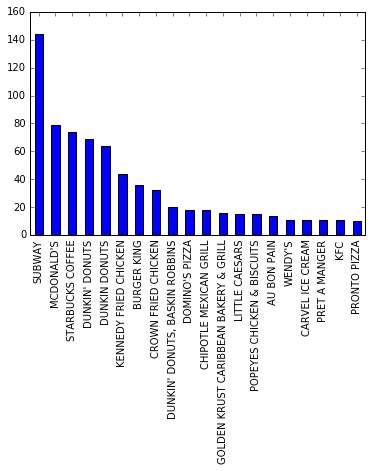

In [116]:
popDf = Series(df3['DBA']).value_counts()[0:20]  
%pylab inline
popDf.plot(kind = "bar") 


.5.  What fraction of all restaurants are chains?  

df3 is a dataframe that contains all the chain restaurants therefore its number of rows is the number of restaurants that are parts of chains. I divided this by the number of unique restaurants (restaurants are different addresses). About 16.47% of the restaurants are chains. 


In [117]:
float(len(df3))/df['RESTAURANT'].nunique() 

0.16472216729286138

.6. Plot the number of non-chain restaurants in each boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the "missing" boro.  

I used essentially the same filter only making the lambda function only count if it's less than 2 (i.e. Not a chain). Then made the dataframe equal to the dataframe where the dataframe[BORO] does not equal missing. Then I did a value count and plotted it. 

Populating the interactive namespace from numpy and matplotlib


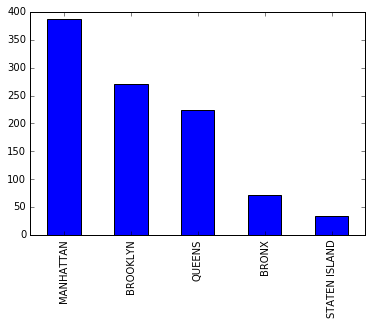

In [118]:
df4 = df.groupby('DBA').filter(lambda x: len(x)<2) 

df4 = df4[df4['BORO'] != 'Missing'] 

%pylab inline
df5 = df4['BORO'].value_counts()

df5.plot(kind = 'bar')

.7. Plot the fraction of non-chain restaurants in each boro. The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most \independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?  


Manhattan was the boro with the most non=chain restaurants, but Brooklyn has the bighest percentage of non-chain to total restaurants. 

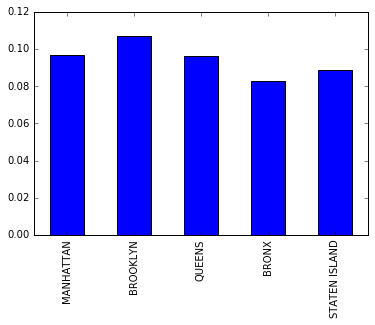

In [119]:
df6 = df[['DBA', 'BORO', 'RESTAURANT']].drop_duplicates() #This is the total restaurants 
df6 = df6[df6['BORO'] != 'Missing']
df7 = df5/df6['BORO'].value_counts()

df7.plot(kind = "bar") 

.8. Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Plot the popularity of the top 20 cuisines. Again, be careful in your counting: remember that the same restaurant can have multiple violations! 

I created a dataframe with the keys of interest and plotted it based on value count.

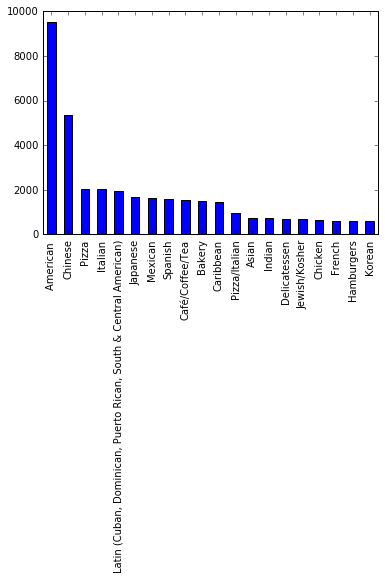

In [120]:
df8 = df[['DBA', 'BORO', 'CUISINE DESCRIPTION', 'RESTAURANT']] 
df9 = df8['CUISINE DESCRIPTION'].value_counts()[0:20] 

df9.plot(kind = "bar")

.9. Plot the cuisines among restaurants which never got cited for violations. Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the 'VIOLATION CODE' field is missing.
• Select only the ’RESTAURANT’ and ’CUISINE DESCRIPTION’ columns of the DataFrame (we created the ’RESTAURANT’ field in an earlier question).
• Select the instances where a restaurant did not get cited.
• Among these instances, how frequent is each of the cuisines? 


I created a dataframe with the three keys I thought were relevent (dropping duplicates to avoid getting the same restaurants multiple times). I created a mask with the isnull function to get only the restaurants who had no violations. Then I plotted the counts of the top cuisines who had no violations. American cuisine won with 120, but they were also the most common cuisine overall, so we would have to look at a rate to know which is the cleanest cuisine.   

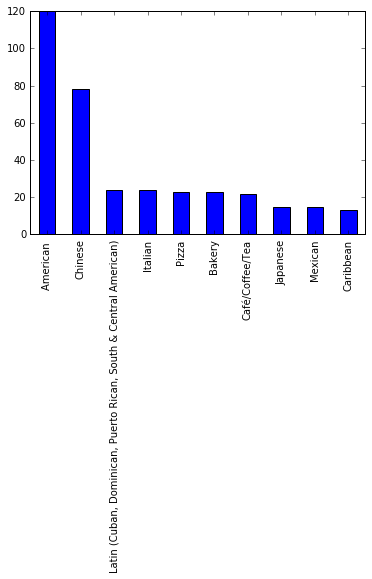

In [121]:
df10 = df[['RESTAURANT', 'CUISINE DESCRIPTION', 'VIOLATION CODE']].drop_duplicates() 

mask = df10["VIOLATION CODE"].isnull()

df11 = df10[mask] 

df11['CUISINE DESCRIPTION'].value_counts()[0:10].plot(kind = "bar")



.10. What cuisines tend to be the "cleanest"?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.
• For each such cuisine, compute the ratio of inspections where the violation code is missing (so the inspection passed) versus the total number of rows for that cuisine. (This is just the ratio of counts in the previous two questions.)
• Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean." (Hint: Check out the "sort values" method for Series). 

I created dataframes for the total counts of cuisines and cuisines of restaurants without a violation. Then I used a mask to only get cuisines with at least 20 restaurants representing them. I applied that mask to both dataframes and divided them. Then I sorted them descending values and plotted the top 10. 

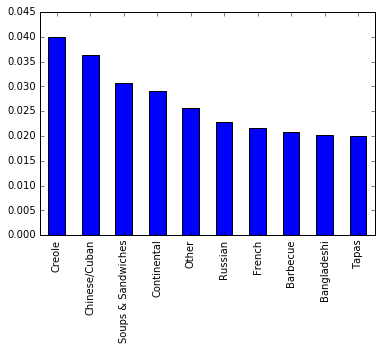

In [122]:
df12 = df11['CUISINE DESCRIPTION'].value_counts() 
df13 = df8['CUISINE DESCRIPTION'].value_counts()
mask = (df13 > 20)  
df14 = df12[mask] 
df15 = df13[mask]
df16 = df14/df15
df17 = df16.sort_values(ascending = False)
df17[0:10].plot(kind = "bar")